**Importing Required Python Libraries**

In [2]:
import numpy as np     #NumPy library for numerical operations
import pandas as pd    #Pandas library for data manipulation and analysis
import pickle          #Pickle module for saving and loading Python objects

**Manual Function for File Reading**

In [3]:
#Defining a function to manually load a CSV file without using pandas' built-in function
def load_csv(filepath):
  data = []            #List to store data rows
  col = []             #List to store column names
  checkcol = False     #Boolean flag to check if header is already read
  with open(filepath) as f:
    for val in f.readlines():
      val = val.replace("\n","")     #Removing newline characters
      val = val.split(',')           #Splitting the line by commas into a list
      if checkcol is False:
        col = val                  #First row is considered as header
        checkcol = True
      else:
        data.append(val)           #Remaining rows are added as data
  df=pd.DataFrame(data=data, columns=col)
  return df          #Returning the constructed DataFrame

**Loading and Previewing the Dataset**

In [5]:
#Loading the CSV file
myData = load_csv('/content/100 Sales Records.csv')
print(myData.head())   #Displaying the first 5 rows of the DataFrame

                             ﻿Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date Units Sold  \
0       Offline              H  5-28-2010  669165933  6-27-2010       9925   
1        Online              C  8-22-2012  963881480  9-15-2012       2804   
2       Offline              L   5-2-2014  341417157   5-8-2014       1779   
3        Online              C  6-20-2014  514321792   7-5-2014       8102   
4       Offline              L   2-1-2013  115456712   2-6-2013       5062   

  Unit Price Unit Cost Total Revenue  Total Cost T

**Importing Data Using genfromtxt()**

In [6]:
#genfromtxt reads data into a NumPy array, but since the file has text (like column names),
#it might not load everything properly — some values may turn into 'nan'

data = np.genfromtxt('/content/100 Sales Records.csv', delimiter=',')

In [7]:
#Converting the NumPy array (from genfromtxt) into a pandas DataFrame
#This helps in viewing and working with the data in a table format

pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,669165933.0,NaN,9925.0,255.28,159.42,2533654.00,1582243.50,951410.50
2,NaN,NaN,NaN,NaN,NaN,NaN,963881480.0,NaN,2804.0,205.70,117.11,576782.80,328376.44,248406.36
3,NaN,NaN,NaN,NaN,NaN,NaN,341417157.0,NaN,1779.0,651.21,524.96,1158502.59,933903.84,224598.75
4,NaN,NaN,NaN,NaN,NaN,NaN,514321792.0,NaN,8102.0,9.33,6.92,75591.66,56065.84,19525.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,512878119.0,NaN,888.0,109.28,35.84,97040.64,31825.92,65214.72
97,NaN,NaN,NaN,NaN,NaN,NaN,810711038.0,NaN,6267.0,9.33,6.92,58471.11,43367.64,15103.47
98,NaN,NaN,NaN,NaN,NaN,NaN,728815257.0,NaN,1485.0,154.06,90.93,228779.10,135031.05,93748.05
99,NaN,NaN,NaN,NaN,NaN,NaN,559427106.0,NaN,5767.0,81.73,56.67,471336.91,326815.89,144521.02


**To Convert Nan into other datatypes**

In [8]:
#Trying to fix the issue where some values were showing up as 'nan'
#dtype=None helps NumPy detect the correct data types (like text and numbers)
#This avoids incorrect 'nan' entries that happened earlier with default settings

data = np.genfromtxt('/content/100 Sales Records.csv', delimiter=',', dtype=None)

In [9]:
#Converting the NumPy array (from genfromtxt) into a pandas DataFrame
#This helps in viewing and working with the data in a table format

pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,﻿Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
1,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5-28-2010,669165933,6-27-2010,9925,255.28,159.42,2533654,1582243.5,951410.5
2,Central America and the Caribbean,Grenada,Cereal,Online,C,8-22-2012,963881480,9-15-2012,2804,205.7,117.11,576782.8,328376.44,248406.36
3,Europe,Russia,Office Supplies,Offline,L,5-2-2014,341417157,5-8-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
4,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6-20-2014,514321792,7-5-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Sub-Saharan Africa,Mali,Clothes,Online,M,7-26-2011,512878119,9-3-2011,888,109.28,35.84,97040.64,31825.92,65214.72
97,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12-28-2011,6267,9.33,6.92,58471.11,43367.64,15103.47
98,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6-1-2016,728815257,6-29-2016,1485,154.06,90.93,228779.1,135031.05,93748.05
99,North America,Mexico,Personal Care,Offline,M,7-30-2015,559427106,8-8-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


**To Convert column titles into proper format**

In [12]:
#Loading the CSV file with better structure using:
#dtype=None to auto-detect data types (string, int, float)
#names=True to treat the first row as column headers
# This gives a structured NumPy array that works well with pandas
data = np.genfromtxt('/content/100 Sales Records.csv', delimiter=',', dtype=None, names=True)

#Converting the structured array into a proper DataFrame for easier analysis
pd.DataFrame(data)

,﻿Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5-28-2010,669165933,6-27-2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8-22-2012,963881480,9-15-2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5-2-2014,341417157,5-8-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6-20-2014,514321792,7-5-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2-1-2013,115456712,2-6-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7-26-2011,512878119,9-3-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12-28-2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6-1-2016,728815257,6-29-2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7-30-2015,559427106,8-8-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


**To convert bytes format : Converting Encoded Text to Readable Strings using UTF-8**

In [13]:
#Added encoding='utf-8' just to be safe.
#There's no visible difference right now, but it helps avoid errors if the file has special characters like ₹ or é.
#This is useful for working with different datasets in the future.
data = np.genfromtxt('/content/100 Sales Records.csv', delimiter=',', dtype=None, names=True, encoding='utf-8')

#Convert the structured NumPy array into a clean pandas DataFrame
pd.DataFrame(data)

,﻿Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5-28-2010,669165933,6-27-2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8-22-2012,963881480,9-15-2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5-2-2014,341417157,5-8-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6-20-2014,514321792,7-5-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2-1-2013,115456712,2-6-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7-26-2011,512878119,9-3-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12-28-2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6-1-2016,728815257,6-29-2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7-30-2015,559427106,8-8-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


**Loading Dataset with pandas read.csv()**

In [14]:
import pandas as pf   #Importing the pandas library for data handling

In [15]:
#Reading the CSV file into a pandas DataFrame
#This is an easier and cleaner way to load data compared to using NumPy
old_df = pd.read_csv('/content/100 Sales Records.csv')

#Displaying the first 5 rows of the data to check if it's loaded properly
print(old_df.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5-28-2010  669165933  6-27-2010        9925   
1        Online              C  8-22-2012  963881480  9-15-2012        2804   
2       Offline              L   5-2-2014  341417157   5-8-2014        1779   
3        Online              C  6-20-2014  514321792   7-5-2014        8102   
4       Offline              L   2-1-2013  115456712   2-6-2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

**Checking Memory Usage of the DataFrame**

In [ ]:
#Checking how much memory each column is using in the DataFrame
#deep=True gives a more accurate result, especially for text columns

old_df.memory_usage(deep=True)

,0
Index,132
Region,7305
Country,6602
Item Type,6622
Sales Channel,6350
Order Priority,5800
Order Date,6596
Order ID,800
Ship Date,6598
Units Sold,800


**Generating Summary Statistics of the Dataset**

In [ ]:
old_df.describe()  #Shows summary statistics (like mean, min, max) for all numerical columns

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


**Viewing Specific Rows and Columns Using loc[]**

In [ ]:
#Selecting rows 10 to 15 and only the 'Region', 'Item Type', and 'Total Cost' columns
old_df.loc[10:15,['Region', 'Item Type', 'Total Cost']]

,Region,Item Type,Total Cost
10,Asia,Vegetables,11275.32
11,Sub-Saharan Africa,Clothes,149381.12
12,Asia,Clothes,296145.92
13,Central America and the Caribbean,Household,4509793.96
14,Asia,Personal Care,277739.67
15,Europe,Clothes,59960.32


**Converting 'Order Date' Column to Datetime Format**

In [16]:
#Converting 'Order Date' column from string to datetime format
old_df['Order Date'] = pd.to_datetime(old_df['Order Date'])

old_df['Order Date']   #Displaying the updated 'Order Date' column

,Order Date
0,2010-05-28
1,2012-08-22
2,2014-05-02
3,2014-06-20
4,2013-02-01
...,...
95,2011-07-26
96,2011-11-11
97,2016-06-01
98,2015-07-30


**Sorting Data by Region**

In [ ]:
#Sorting the data based on the 'Region' column in alphabetical order
#inplace=True updates the DataFrame directly without needing to assign it again
old_df.sort_values(by='Region', inplace=True)

old_df.head(50)  # Displaying the first 50 rows

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
33,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,3-1-2015,8250,668.27,502.54,5513227.50,4145955.00,1367272.50
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,12-28-2011,6267,9.33,6.92,58471.11,43367.64,15103.47
18,Asia,Turkmenistan,Household,Offline,L,2010-12-30,441619336,1-20-2011,3830,668.27,502.54,2559474.10,1924728.20,634745.90
70,Asia,Turkmenistan,Office Supplies,Online,M,2013-04-23,462405812,5-20-2013,5010,651.21,524.96,3262562.10,2630049.60,632512.50
77,Asia,Laos,Vegetables,Offline,C,2011-09-15,789176547,10-23-2011,3732,154.06,90.93,574951.92,339350.76,235601.16
16,Asia,Sri Lanka,Cosmetics,Offline,M,2016-11-19,419123971,12-18-2016,6952,437.20,263.33,3039414.40,1830670.16,1208744.24
38,Asia,Brunei,Office Supplies,Online,L,2012-04-01,320009267,5-8-2012,6708,651.21,524.96,4368316.68,3521431.68,846885.00
10,Asia,Kyrgyzstan,Vegetables,Online,H,2011-06-24,814711606,7-12-2011,124,154.06,90.93,19103.44,11275.32,7828.12
14,Asia,Mongolia,Personal Care,Offline,C,2014-02-19,832401311,2-23-2014,4901,81.73,56.67,400558.73,277739.67,122819.06
12,Asia,Bangladesh,Clothes,Online,L,2017-01-13,187310731,3-1-2017,8263,109.28,35.84,902980.64,296145.92,606834.72


**Frequency of Each Region**

In [ ]:
Dc=old_df['Region'].value_counts()  #Counting how many times each region appears in the dataset
Dc

,count
Region,
Sub-Saharan Africa,36
Europe,22
Asia,11
Australia and Oceania,11
Middle East and North Africa,10
Central America and the Caribbean,7
North America,3


**Visualizing Region Frequencyt**

<Axes: ylabel='Region'>

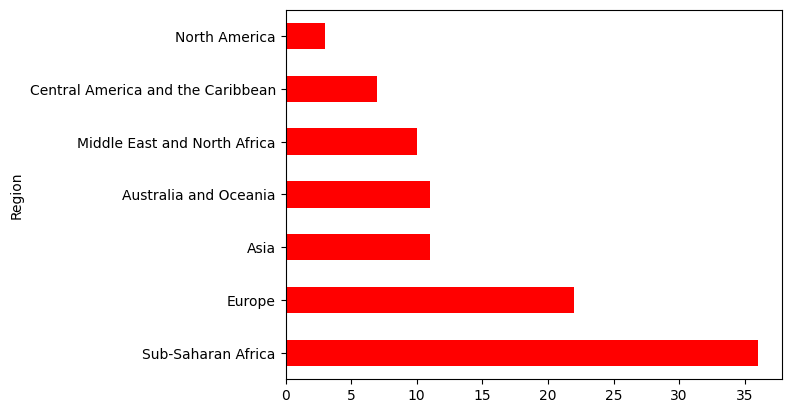

In [ ]:
#Plotting a horizontal bar chart to show the frequency of each region
#'barh' is used for horizontal bars and 'r' sets the bar color to red
old_df['Region'].value_counts().plot(kind='barh', color='r')

**Horizontal Bar Chart of Country-wise Record Frequency (with Custom Size)**

<Axes: ylabel='Country'>

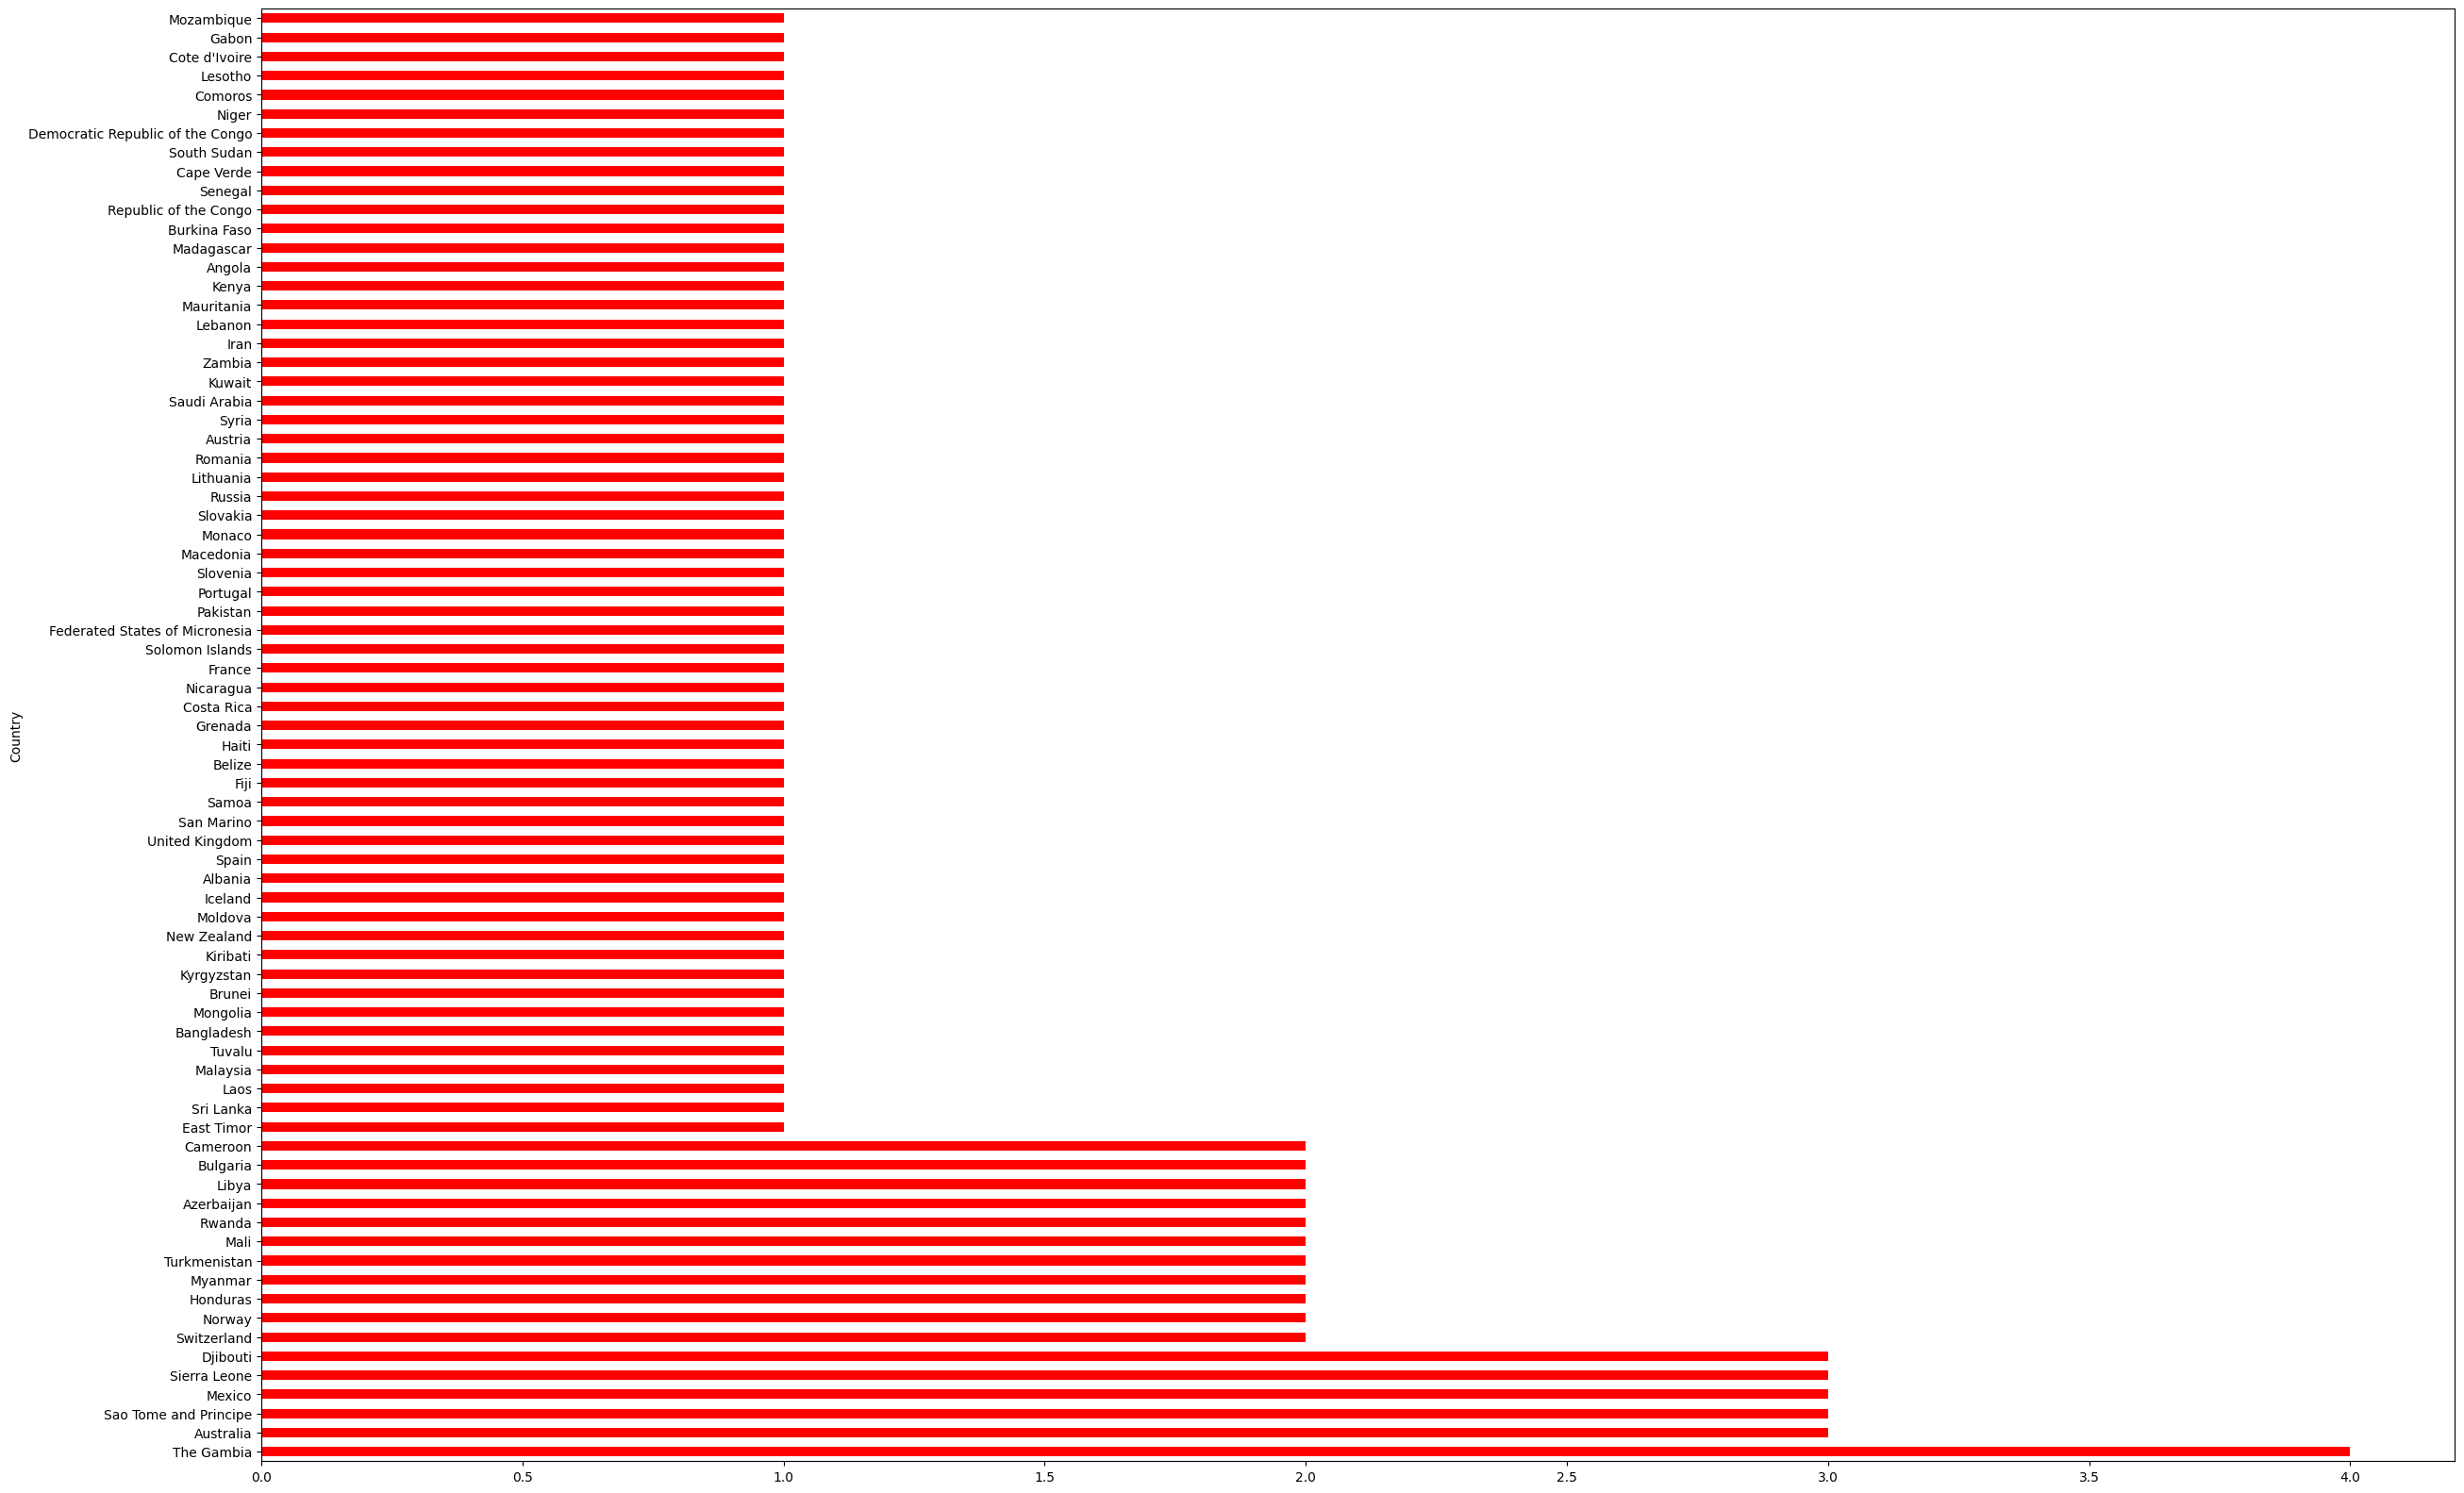

In [ ]:
#Plotting the frequency of each country using a horizontal bar chart
#'figsize=[30,20]' makes the chart bigger for better readability

old_df['Country'].value_counts().plot(kind='barh', color='r', figsize=[30,20])

**Sort by Units Sold**

In [ ]:
#Sort by 'Units Sold' in ascending order
old_df.sort_values(by='Units Sold', inplace =True)

old_df   #Show the sorted DataFrame

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
10,Asia,Kyrgyzstan,Vegetables,Online,H,2011-06-24,814711606,7-12-2011,124,154.06,90.93,19103.44,11275.32,7828.12
43,Europe,Slovakia,Vegetables,Online,H,2012-10-06,759224212,11-10-2012,171,154.06,90.93,26344.26,15549.03,10795.23
47,Europe,Switzerland,Personal Care,Online,M,2010-12-23,617667090,1-31-2011,273,81.73,56.67,22312.29,15470.91,6841.38
58,Europe,United Kingdom,Household,Online,L,2012-01-05,955357205,2-14-2012,282,668.27,502.54,188452.14,141716.28,46735.86
88,Middle East and North Africa,Kuwait,Fruits,Online,M,2012-04-30,513417565,5-18-2012,522,9.33,6.92,4870.26,3612.24,1258.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Sub-Saharan Africa,Lesotho,Fruits,Online,L,2013-08-18,918419539,9-18-2013,9606,9.33,6.92,89623.98,66473.52,23150.46
79,Australia and Oceania,Samoa,Cosmetics,Online,H,2013-07-20,670854651,8-7-2013,9654,437.20,263.33,4220728.80,2542187.82,1678540.98
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,2013-07-05,231145322,8-16-2013,9892,437.20,263.33,4324782.40,2604860.36,1719922.04
56,Australia and Oceania,Fiji,Clothes,Offline,C,2010-06-30,647876489,8-1-2010,9905,109.28,35.84,1082418.40,354995.20,727423.20


**Saving and Reloading DataFrame Using Pickle**

In [ ]:
#Save the DataFrame in binary format using pickle
with open('test.pkl','wb')as f:
  pickle.dump(old_df,f)

In [ ]:
#Load the DataFrame from the pickle file
with open('test.pkl','rb')as f:
  new_df=pickle.load(f)

In [ ]:
new_df.head()    #Show first 5 rows of the loaded DataFrame

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
10,Asia,Kyrgyzstan,Vegetables,Online,H,2011-06-24,814711606,7-12-2011,124,154.06,90.93,19103.44,11275.32,7828.12
43,Europe,Slovakia,Vegetables,Online,H,2012-10-06,759224212,11-10-2012,171,154.06,90.93,26344.26,15549.03,10795.23
47,Europe,Switzerland,Personal Care,Online,M,2010-12-23,617667090,1-31-2011,273,81.73,56.67,22312.29,15470.91,6841.38
58,Europe,United Kingdom,Household,Online,L,2012-01-05,955357205,2-14-2012,282,668.27,502.54,188452.14,141716.28,46735.86
88,Middle East and North Africa,Kuwait,Fruits,Online,M,2012-04-30,513417565,5-18-2012,522,9.33,6.92,4870.26,3612.24,1258.02
